In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder ,RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt





# Lodaing the df_log_clipped.csv data frame 
df = pd.read_csv('df_log_clipped.csv')

# Checking the data
df.head()


,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,udp,CON,0.001054,132,164,31,29,0,0,dns,...,0,3,7,1,3,0.693147,1,1,normal,0
1,udp,CON,0.035496,528,304,31,29,0,0,none,...,0,2,4,2,3,0.693147,1,2,normal,0
2,udp,CON,0.001118,146,178,31,29,0,0,dns,...,0,12,8,1,2,0.693147,1,1,normal,0
3,udp,CON,0.001208,132,164,31,29,0,0,dns,...,0,6,9,1,1,0.693147,1,1,normal,0
4,udp,CON,0.001168,146,178,31,29,0,0,dns,...,0,7,9,1,1,0.693147,1,1,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027332 entries, 0 to 2027331
Data columns (total 43 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  sload             float64
 11  dload             float64
 12  spkts             int64  
 13  dpkts             int64  
 14  swin              int64  
 15  dwin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smean             int64  
 19  dmean             int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  sjit              float64
 23  djit              float64
 24  Src_pkt_AT        float64
 25  Dst_pkt_AT        float64
 26  tcprtt        

In [4]:
df.dtypes

proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
sload               float64
dload               float64
spkts                 int64
dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smean                 int64
dmean                 int64
trans_depth           int64
res_bdy_len           int64
sjit                float64
djit                float64
Src_pkt_AT          float64
Dst_pkt_AT          float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mthd      int64
is_ftp_login          int64
ct_ftp_cmd            int64
ct_srv_src            int64
ct_srv_dst          

In [8]:
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,udp,CON,0.001054,132,164,31,29,0,0,dns,...,0,3,7,1,3,0.693147,1,1,normal,0
1,udp,CON,0.035496,528,304,31,29,0,0,none,...,0,2,4,2,3,0.693147,1,2,normal,0
2,udp,CON,0.001118,146,178,31,29,0,0,dns,...,0,12,8,1,2,0.693147,1,1,normal,0
3,udp,CON,0.001208,132,164,31,29,0,0,dns,...,0,6,9,1,1,0.693147,1,1,normal,0
4,udp,CON,0.001168,146,178,31,29,0,0,dns,...,0,7,9,1,1,0.693147,1,1,normal,0


In [10]:
################################################
# Label Encoding (Exclude 'attack_cat')
################################################

# Identify categorical columns 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude 'attack_cat' for separate encoding
if 'attack_cat' in categorical_cols:
    categorical_cols.remove('attack_cat')

LE = LabelEncoder()

# Apply label encoding to each remaining categorical column
for col in categorical_cols:
    df[col] = LE.fit_transform(df[col])

# Encode 'attack_cat' separately
df['attack_cat_encoded'] = LabelEncoder().fit_transform(df['attack_cat'])

# Quick check
print(f"Encoded DataFrame shape: {df.shape}")


Encoded DataFrame shape: (2027332, 44)


In [12]:
# Displaying the data after it's been Label Encoded

pd.set_option('display.max_columns', None)
df.head()


,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,res_bdy_len,sjit,djit,Src_pkt_AT,Dst_pkt_AT,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label,attack_cat_encoded
0,120,2,0.001054,132,164,31,29,0,0,1,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,0.016857,0.012916,0.0,0.0,0.0,0,0,0,0,0,3,7,1,3,0.693147,1,1,normal,0,6
1,120,2,0.035496,528,304,31,29,0,0,5,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,2.387938,2.458112,2.080066,2.147606,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,0.693147,1,2,normal,0,6
2,120,2,0.001118,146,178,31,29,0,0,1,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,0.016857,0.012916,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,0.693147,1,1,normal,0,6
3,120,2,0.001208,132,164,31,29,0,0,1,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,0.042101,0.013903,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,0.693147,1,1,normal,0,6
4,120,2,0.001168,146,178,31,29,0,0,1,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,0.004988,0.002996,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,0.693147,1,1,normal,0,6


In [14]:
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,res_bdy_len,sjit,djit,Src_pkt_AT,Dst_pkt_AT,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label,attack_cat_encoded
0,120,2,0.001054,132,164,31,29,0,0,1,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,0.016857,0.012916,0.0,0.0,0.0,0,0,0,0,0,3,7,1,3,0.693147,1,1,normal,0,6
1,120,2,0.035496,528,304,31,29,0,0,5,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,2.387938,2.458112,2.080066,2.147606,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,0.693147,1,2,normal,0,6
2,120,2,0.001118,146,178,31,29,0,0,1,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,0.016857,0.012916,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,0.693147,1,1,normal,0,6
3,120,2,0.001208,132,164,31,29,0,0,1,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,0.042101,0.013903,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,0.693147,1,1,normal,0,6
4,120,2,0.001168,146,178,31,29,0,0,1,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,0.004988,0.002996,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,0.693147,1,1,normal,0,6


In [16]:
df.attack_cat.value_counts()

attack_cat
normal            1938908
exploits            27436
fuzzers             20965
generic             18860
reconnaissance      10118
dos                  5502
analysis             2033
backdoor             1881
shellcode            1458
worms                 171
Name: count, dtype: int64

In [18]:
df.attack_cat_encoded.value_counts()

attack_cat_encoded
6    1938908
3      27436
4      20965
5      18860
7      10118
2       5502
0       2033
1       1881
8       1458
9        171
Name: count, dtype: int64

In [20]:
# This will be our first Logistic Regression Model that predicts the Label (1/0)
# Later we'll create another multi-class predictor model using a subset of the data (where Label == 1) and try to predict the attack_cat

################################################
# Logistic Regression (Optimized with Grid Search)
################################################
# First Model: Label Prediction (1/0)
################################################


# Split features and label
X = df.drop(['label', 'attack_cat'], axis=1)
y = df['label']



# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Scaling the Data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler=RobustScaler()
X=scaler.fit_transform(X)

In [21]:
X_test.shape

(405467, 42)

In [22]:
y_test.shape

(405467,)

In [26]:
y.value_counts()

label
0    1938908
1      88424
Name: count, dtype: int64

In [28]:
# # Applying Grid Search for our Random Forests Learning model
# Classification Report _ Without using Grid Search (Test Set):
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00    387782
#            1       0.93      0.90      0.92     17685

#     accuracy                           0.99    405467
#    macro avg       0.96      0.95      0.96    405467
# weighted avg       0.99      0.99      0.99    405467

####################################################################
# Now we use Grid Search and note the difference in our model
####################################################################


# Step 1: Define base model
rfc = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Step 2: Define small grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Step 3: Run Grid Search
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Step 4: Use best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 5: Make predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 7.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time= 6.6min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 3.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 7.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time= 6.8min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 3.0min
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time= 7.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time= 7.5min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 2.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time= 8.5min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 5.1min
[CV] END max_depth=20, min_samples_split

Train Accuracy: 1.0000
Test Accuracy: 1.0000


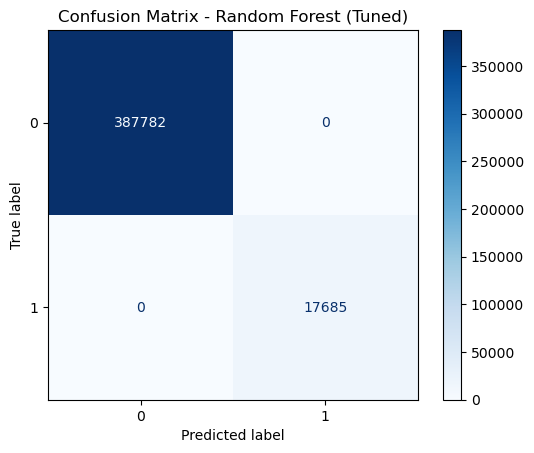

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387782
           1       1.00      1.00      1.00     17685

    accuracy                           1.00    405467
   macro avg       1.00      1.00      1.00    405467
weighted avg       1.00      1.00      1.00    405467



In [29]:

# Step 6: Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.grid(False)
plt.show()

# Step 8: Classification Report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


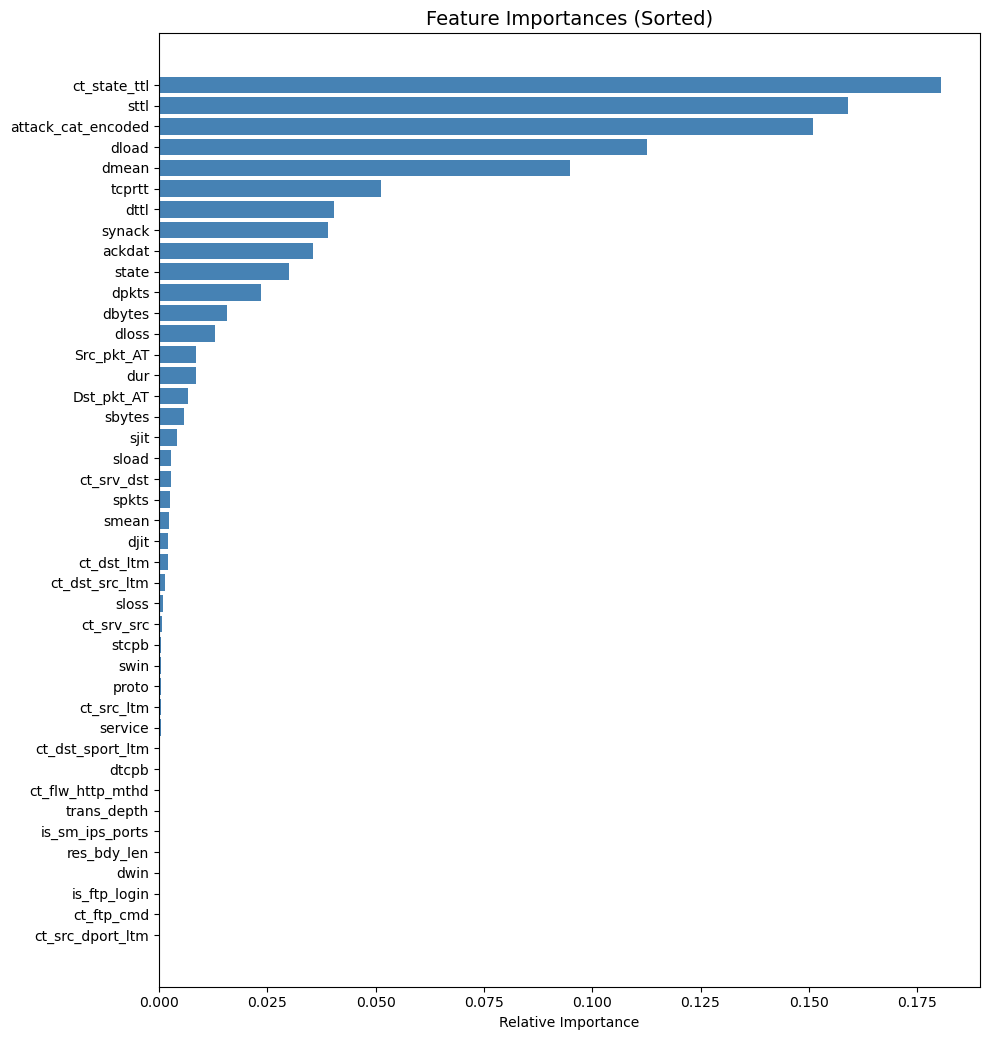

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Get all feature names
features = X_train.columns

# Get importances and sort them in descending order
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Remove label/attack_cat if they somehow exist (precaution)
features = [col for col in features if col not in ['label', 'attack_cat']]
importances = [imp for i, imp in enumerate(importances) if features[i] not in ['label', 'attack_cat']]

# Plot ALL features
plt.figure(figsize=(10, len(features) * 0.25))
plt.title("Feature Importances (Sorted)", fontsize=14)
plt.barh(range(len(indices)), np.array(importances)[indices], color='steelblue')  # darker color
plt.yticks(range(len(indices)), np.array(features)[indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.gca().invert_yaxis()  # Most important on top
plt.show()


In [31]:
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import RobustScaler

# # Step 1: Scale the data
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Step 2: Apply SMOTE only to training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# print("Before SMOTE:")
# print(y_train.value_counts())
# print("\nAfter SMOTE:")
# print(y_train_resampled.value_counts())

# # Step 3: Train Random Forest on SMOTEd data
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train_resampled, y_train_resampled)

# # Step 4: Predict on test set
# y_test_pred = rfc.predict(X_test)

# # Step 5: Classification report)
# print("\nClassification Report (Test Set):")
# print(classification_report(y_test, y_test_pred))


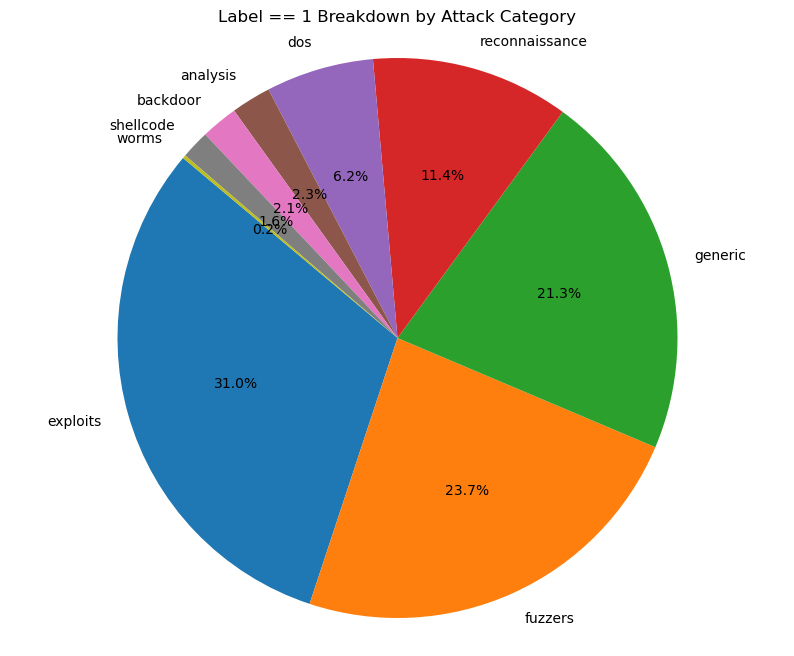

In [28]:
# Plotting a Pie chart for attack_categories for label == 1 (Before oversampling using SMOTE)

# Filter rows where label == 1
label_1_df = df[df['label'] == 1]

# Count each attack category within label == 1
attack_cat_counts = label_1_df['attack_cat'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(attack_cat_counts.values, labels=attack_cat_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label == 1 Breakdown by Attack Category')
plt.axis('equal')
plt.show()

In [56]:
# ✅ Merge rare classes into 99 (Other)
rare_classes = [0, 1, 8, 9]
merged_label = 99

# Create merged label column
df['attack_cat_encoded_merged'] = df['attack_cat_encoded'].apply(
    lambda x: merged_label if x in rare_classes else x
)

# ✅ Human-readable names for merged classes
class_name_mapping = {
    2: "dos (#2)",
    3: "exploits (#3)",
    4: "fuzzers (#4)",
    5: "generic (#5)",
    7: "reconnaissance (#7)",
    99: "merged_rare (analysis, backdoor, shellcode, worms) (#99)"
}

# ✅ Confirm class distribution among attacks only
from collections import Counter

df_attacks = df[df['label'] == 1]
counts = Counter(df_attacks['attack_cat_encoded_merged'])

print("✅ Merged attack_cat_encoded distribution:")
for label, count in sorted(counts.items()):
    name = class_name_mapping.get(label, f"Unknown #{label}")
    print(f"{name}: {count} samples")


✅ Merged attack_cat_encoded distribution:
dos (#2): 5502 samples
exploits (#3): 27436 samples
fuzzers (#4): 20965 samples
generic (#5): 18860 samples
reconnaissance (#7): 10118 samples
merged_rare (analysis, backdoor, shellcode, worms) (#99): 5543 samples


In [58]:
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import train_test_split
# from collections import Counter
# import matplotlib.pyplot as plt

# # 1. Filter only attack samples
# df_attacks = df[df['label'] == 1].copy()

# # 2. Separate features and target
# X_attack = df_attacks.drop(['label', 'attack_cat', 'attack_cat_encoded'], axis=1)
# y_attack = df_attacks['attack_cat_encoded']

# # 3. Split
# X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
#     X_attack, y_attack, test_size=0.2, stratify=y_attack, random_state=42
# )

# # 4. Scale
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train_a)
# X_test_scaled = scaler.transform(X_test_a)

# # 5. Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_a)

# # 6. Plot before & after
# before_counts = Counter(y_train_a)
# after_counts = Counter(y_train_resampled)

# fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# axs[0].pie(before_counts.values(), labels=before_counts.keys(), autopct='%1.1f%%', startangle=140)
# axs[0].set_title('Before SMOTE (Attack Categories)')

# axs[1].pie(after_counts.values(), labels=after_counts.keys(), autopct='%1.1f%%', startangle=140)
# axs[1].set_title('After SMOTE (Balanced Attack Categories)')

# plt.tight_layout()
# plt.show()


In [60]:
from sklearn.model_selection import train_test_split

# 1. Filter only attack rows
df_attacks = df[df['label'] == 1].copy()

# 2. Use the merged 'attack_cat_encoded_merged' column

# 3. Define X and y
X_attack = df_attacks.drop(['label', 'attack_cat', 'attack_cat_encoded', 'attack_cat_encoded_merged'], axis=1)
y_attack = df_attacks['attack_cat_encoded_merged']

# 4. Split into train/test sets
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack, test_size=0.2, random_state=42, stratify=y_attack
)

print("Train shape:", X_train_a.shape)
print("Test shape:", X_test_a.shape)
print("Unique attack categories:", y_attack.nunique())


Train shape: (70739, 41)
Test shape: (17685, 41)
Unique attack categories: 6


Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
📊 Classification Report (Multiclass - Attack Categories):
                                                          precision    recall  f1-score   support

                                                dos (#2)      0.469     0.283     0.353      1100
                                           exploits (#3)      0.865     0.832     0.848      5487
                                            fuzzers (#4)      0.941     0.892     0.916      4193
                                            generic (#5)      0.978     0.857     0.914      3772
                                     reconnaissance (#7)      0.830     0.786     0.808      2024
merged_rare (analysis, backdoor, shellcode, worms) (#99)      0.339     0.781     0.473      1109

                                                accuracy                          0.809     17685
              

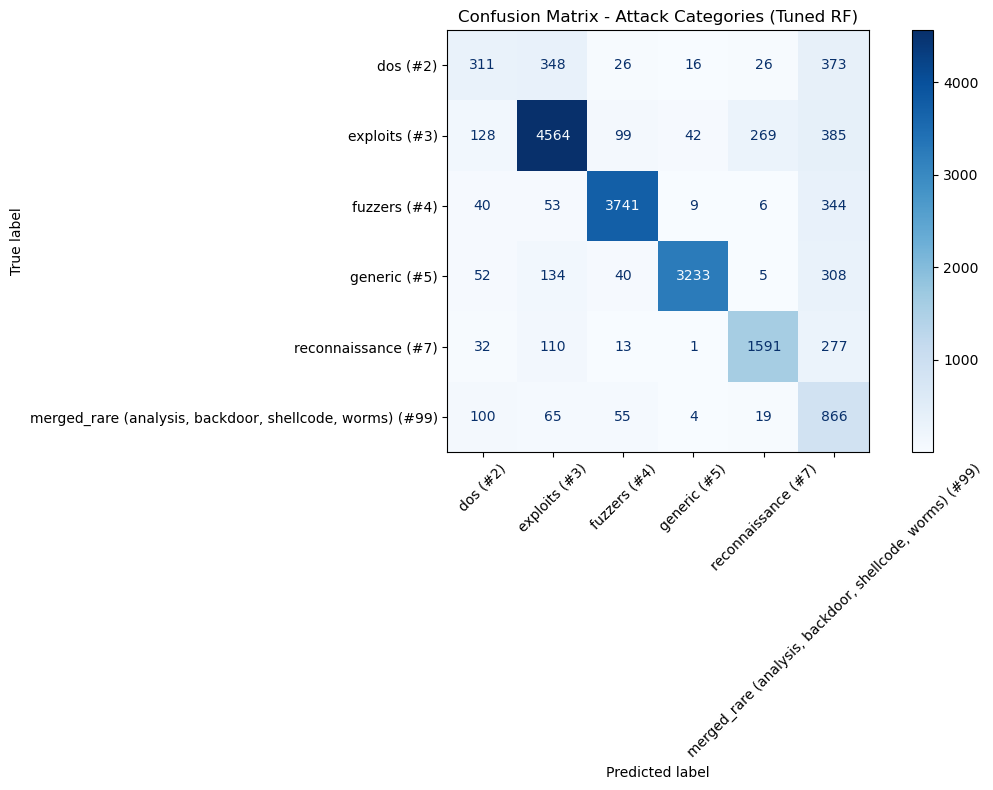

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Define a smaller grid (faster)
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5]
}

# 2. Initialize Random Forest
base_rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# 3. Grid Search (f1_macro is best for multiple classes)
grid_search = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 4. Fit directly on unbalanced but real training data (no SMOTE)
grid_search.fit(X_train_a, y_train_a)

# 5. Get best model
rfc_attack = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# 6. Predict
y_pred_a = rfc_attack.predict(X_test_a)

# ✅ 7. Report & Confusion Matrix with Named Labels
class_name_mapping = {
    2: "dos (#2)",
    3: "exploits (#3)",
    4: "fuzzers (#4)",
    5: "generic (#5)",
    7: "reconnaissance (#7)",
    99: "merged_rare (analysis, backdoor, shellcode, worms) (#99)"
}

ordered_labels = sorted(class_name_mapping.keys())
target_names = [class_name_mapping[label] for label in ordered_labels]

print("📊 Classification Report (Multiclass - Attack Categories):")
print(classification_report(
    y_test_a,
    y_pred_a,
    labels=ordered_labels,
    target_names=target_names,
    digits=3,
    zero_division=1
))

cm = confusion_matrix(y_test_a, y_pred_a, labels=ordered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(12, 8))  # Bigger plot size
disp.plot(cmap='Blues', xticks_rotation=45, ax=ax)  # <- CLOSE THIS LINE
plt.title('Confusion Matrix - Attack Categories (Tuned RF)')  # <- NEW LINE
plt.tight_layout()
plt.grid(False)
plt.show()

